# Analysis of Netflix Movies & TV Shows

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
df = pd.read_csv('netflix_titles.csv')

### Display the first few rows of the dataset

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Check information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Check null values in the dataset

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.dropna(subset=['director','cast'], inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


### What is the total number of movies and TV shows in the dataset?

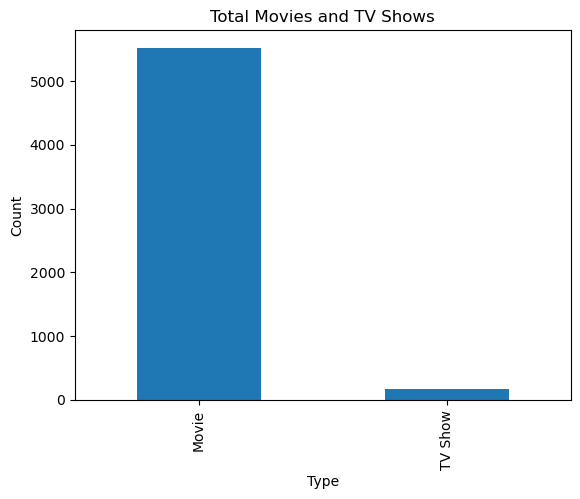

In [9]:
df['type'].value_counts().plot(kind='bar')
plt.title('Total Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### How has the content grown over the years?

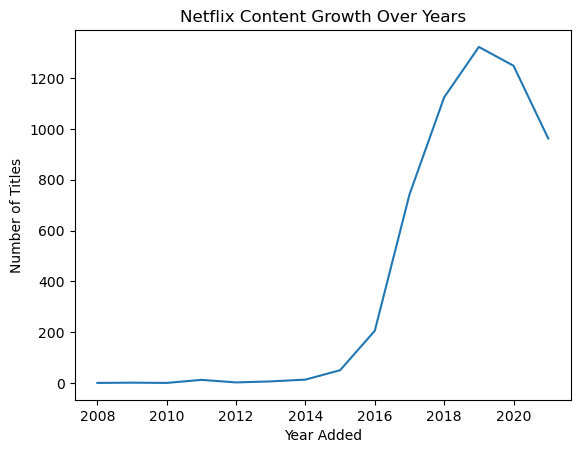

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df_year = df.dropna(subset=['year_added'])
df_year['year_added'].value_counts().sort_index().plot(kind='line')
plt.title('Netflix Content Growth Over Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

### Top 10 genres on Netflix

In [12]:
df['listed_in'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('listed_in')
top_genres = df_exploded['listed_in'].value_counts().head(10)

In [13]:
top_genres

listed_in
International Movies        2548
Dramas                      2398
Comedies                    1636
Action & Adventure           848
Independent Movies           751
Romantic Movies              604
Children & Family Movies     583
Thrillers                    575
Documentaries                418
Horror Movies                352
Name: count, dtype: int64

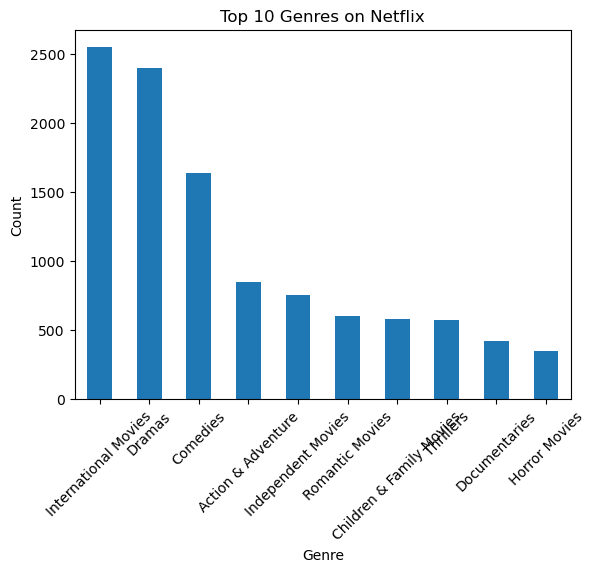

In [14]:
top_genres.plot(kind='bar')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Content by country

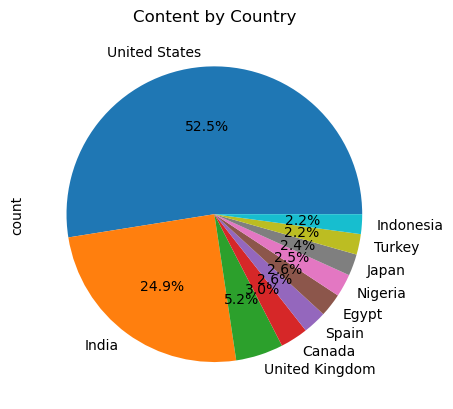

In [15]:
df['country'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Content by Country')
plt.show()

### What’s the longest/shortest show/movie?

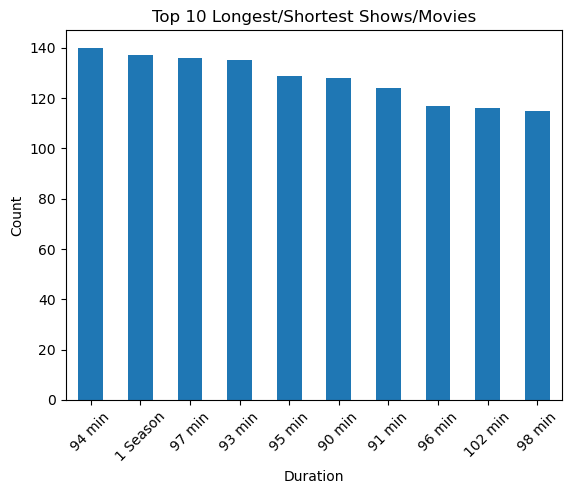

In [16]:
df['duration'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Longest/Shortest Shows/Movies')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Clean Data

In [22]:
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z]+)')
print(df[['duration', 'duration_num', 'duration_unit']])

       duration  duration_num duration_unit
2      1 Season           1.0        Season
5      1 Season           1.0        Season
6        91 min          91.0           min
7       125 min         125.0           min
8     9 Seasons           9.0       Seasons
...         ...           ...           ...
8801     96 min          96.0           min
8802    158 min         158.0           min
8804     88 min          88.0           min
8805     88 min          88.0           min
8806    111 min         111.0           min

[5700 rows x 3 columns]


## 📌 Summary & Insights:

- Netflix has more Movies than TV Shows.
- Maximum content was added between 2018 and 2020.
- Drama and Comedy are the most common genres.
- USA produces the highest number of Netflix titles.
